In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 




#### Data overview 

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/Administrator/Downloads/Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [4]:
df.isnull().sum()


Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [5]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday  

C:\Windows\Temp\ipykernel_7608\4207532211.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


In [6]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Transaction_Time'].apply(categorize_time)

C:\Windows\Temp\ipykernel_7608\3243298511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [7]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,2025-01-23,...,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,2025,1,23,3,Afternoon
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,2025-01-11,...,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,2025,1,11,5,Evening
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,2025-01-25,...,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,2025,1,25,5,Night
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,2025-01-19,...,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,2025,1,19,6,Afternoon
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,2025-01-30,...,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,2025,1,30,3,Evening


#### Drop column

In [8]:
df = df.drop_duplicates()


In [9]:
df_new = df.drop(columns=['Customer_ID', 'Customer_Name', 
                          'Transaction_ID', 'Merchant_ID',
                          'Transaction_Date','Transaction_Time', 
                          'Transaction_Year', 'Transaction_Month',
                          'Transaction_Currency',
                          'Customer_Contact', 'Customer_Email'])

df_new.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,23,3,Afternoon
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,11,5,Evening
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,25,5,Night
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,19,6,Afternoon
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,30,3,Evening


In [10]:
df_new.to_csv('new_dataset.csv', index=False) 


In [11]:
print(df_new['Is_Fraud'].value_counts(normalize=True))

Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64


In [12]:
import os
print("path：", os.getcwd())


path： c:\Users\Administrator\Downloads


In [23]:
df_new = pd.read_csv("C:/Users/Administrator/Downloads/new_dataset.csv")

#### Create a Test Set

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.2, stratify=df_new['Is_Fraud'], random_state=42)


print("Train Set Class Distribution:\n", train_set['Is_Fraud'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Is_Fraud'].value_counts(normalize=True))


Train Set Class Distribution:
 Is_Fraud
0    0.949562
1    0.050438
Name: proportion, dtype: float64
Test Set Class Distribution:
 Is_Fraud
0    0.94955
1    0.05045
Name: proportion, dtype: float64


#### Categorical into Numerical 

In [25]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold


categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

 
dummy_encode_cols = []  
label_encode_cols = []  
freq_encode_cols = []  
target_encode_cols = []

for col in categorical_cols:
    num_unique = train_set[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)



Dummy Encoding: ['Gender', 'Account_Type', 'Device_Type', 'Time_Category']
Label Encoding: ['Transaction_Type', 'Merchant_Category', 'Transaction_Device']
Frequency Encoding: ['State']
Target Encoding: ['City', 'Bank_Branch', 'Transaction_Location', 'Transaction_Description']


In [26]:
# 1. Dummy Encoding
train_set = pd.get_dummies(train_set, columns=dummy_encode_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=dummy_encode_cols, drop_first=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(0, inplace=True)

# 2. Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])  
    test_set[col] = test_set[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  
    label_encoders[col] = le  

# 3. Frequency Encoding
for col in freq_encode_cols:
    freq_map = train_set[col].value_counts(normalize=True).to_dict()
    train_set[col] = train_set[col].map(freq_map)
    test_set[col] = test_set[col].map(freq_map).fillna(train_set[col].mean())

# 4. K-Fold Target Encoding
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in target_encode_cols:
    train_set[col + '_target_enc'] = 0  # 初始化列
    for train_idx, val_idx in kf.split(train_set):
        train_fold = train_set.iloc[train_idx].copy()
        val_fold = train_set.iloc[val_idx].copy()

        mean_target = train_fold.groupby(col)['Is_Fraud'].mean()
        train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())

    test_set[col + '_target_enc'] = test_set[col].map(train_set.groupby(col)['Is_Fraud'].mean()).fillna(train_set['Is_Fraud'].mean())

train_set.drop(columns=target_encode_cols, inplace=True)
test_set.drop(columns=target_encode_cols, inplace=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(train_set.mean(), inplace=True)

print(f'Processed train set shape: {train_set.shape}')
print(f'Processed test set shape: {test_set.shape}')

C:\Windows\Temp\ipykernel_7608\2060840290.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.06016043 0.04653568 0.03747323 ... 0.05487805 0.03196931 0.04057018]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())
C:\Windows\Temp\ipykernel_7608\2060840290.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.06016043 0.04653568 0.03747323 ... 0.05487805 0.03196931 0.04057018]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean

Processed train set shape: (160000, 23)
Processed test set shape: (40000, 23)


#### Feature Importance

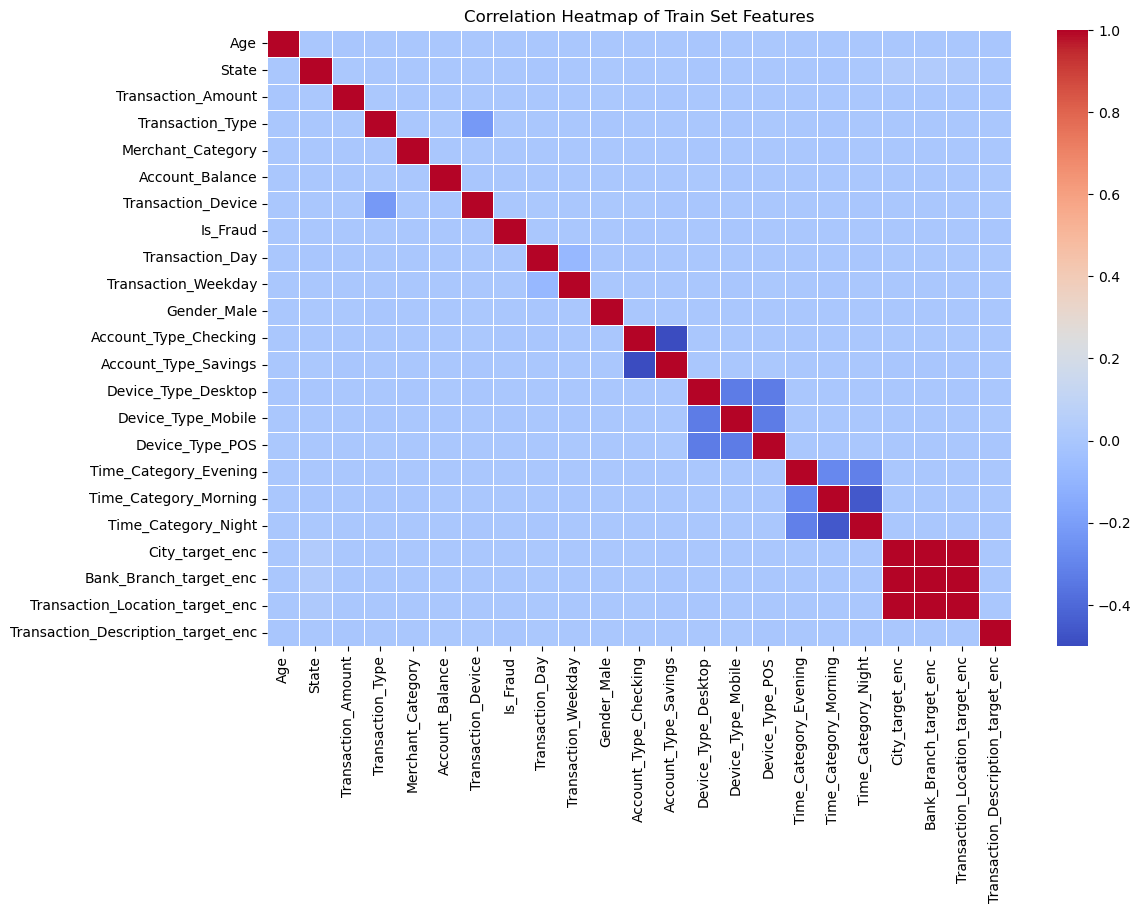

In [27]:
#import seaborn as sns
#import matplotlib.pyplot as plt


correlation_matrix = train_set.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Set Features")
plt.show()


In [28]:
fraud_correlation = train_set.corr()['Is_Fraud'].sort_values(ascending=False)
print(fraud_correlation)


Is_Fraud                              1.000000
Time_Category_Night                   0.003447
Gender_Male                           0.002420
City_target_enc                       0.002324
Bank_Branch_target_enc                0.002324
Transaction_Location_target_enc       0.001954
Device_Type_POS                       0.001918
Transaction_Device                    0.001849
Transaction_Day                       0.001406
Device_Type_Desktop                   0.000903
Transaction_Type                      0.000740
State                                 0.000684
Time_Category_Morning                 0.000241
Account_Balance                      -0.000453
Account_Type_Savings                 -0.000516
Transaction_Amount                   -0.000710
Time_Category_Evening                -0.000835
Age                                  -0.000930
Merchant_Category                    -0.001636
Transaction_Weekday                  -0.002329
Device_Type_Mobile                   -0.002715
Account_Type_

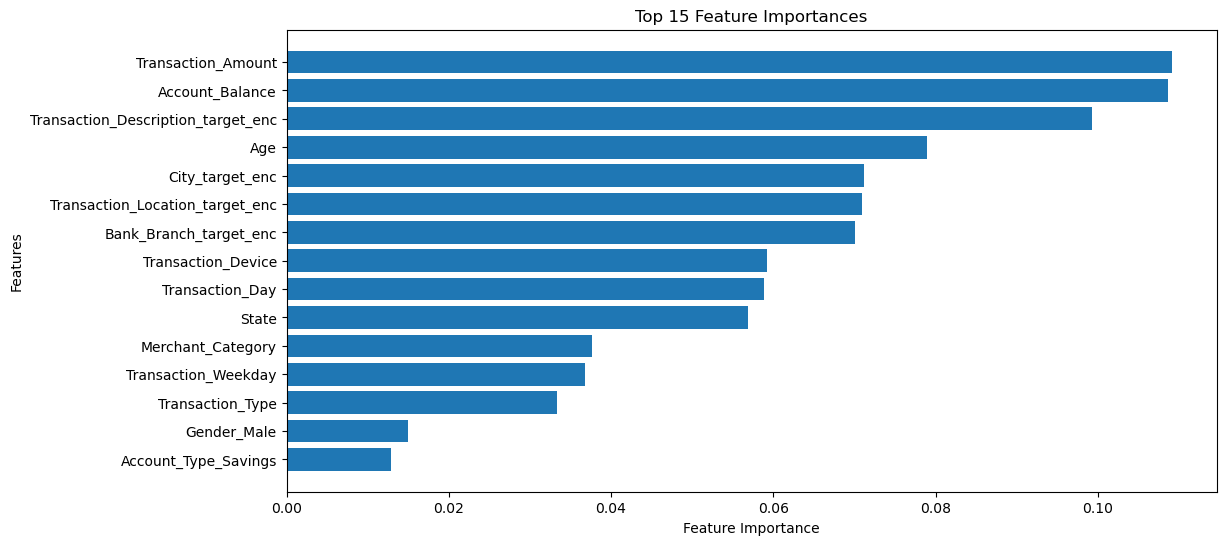

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

X_train = train_set.drop(columns=['Is_Fraud'])
y_train = train_set['Is_Fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [20]:
threshold = 0.005
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()
X_train_selected = X_train[selected_features]


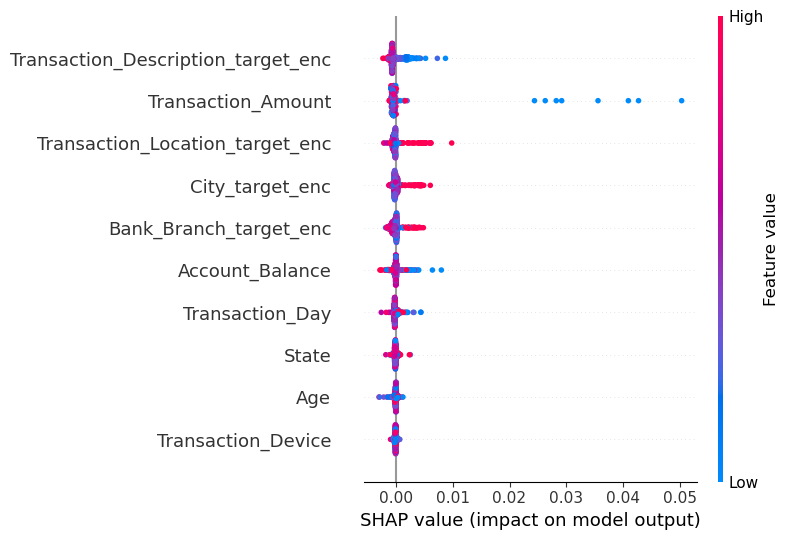

In [33]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier


top_features = feature_importances['Feature'][:10].tolist()  
X_train_selected = X_train[top_features]  

rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, y_train) 


sample_size = 500
X_sample = X_train_selected.sample(sample_size, random_state=42)

explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values[:, :, 1], X_sample)  




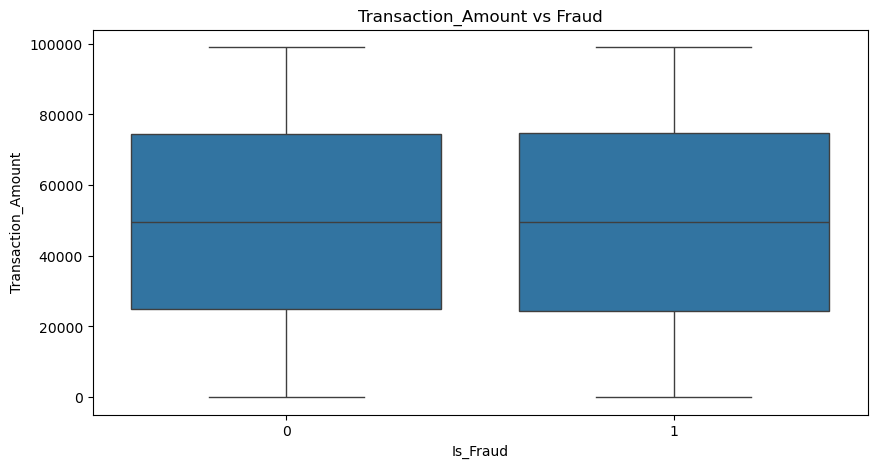

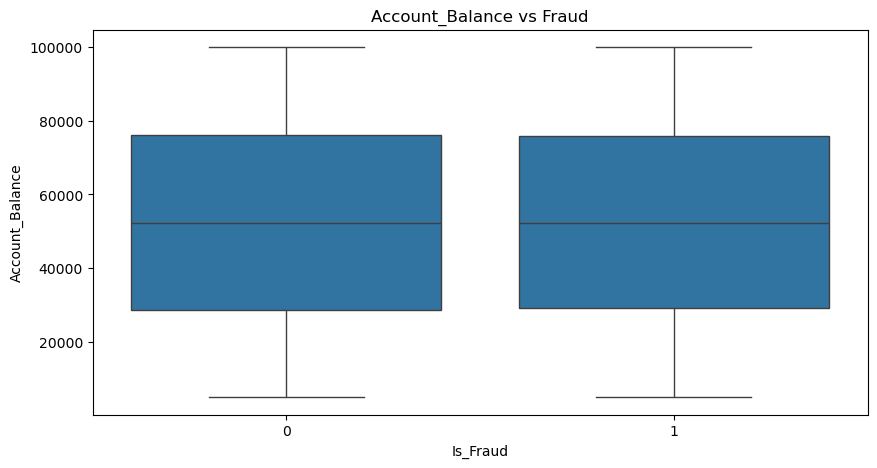

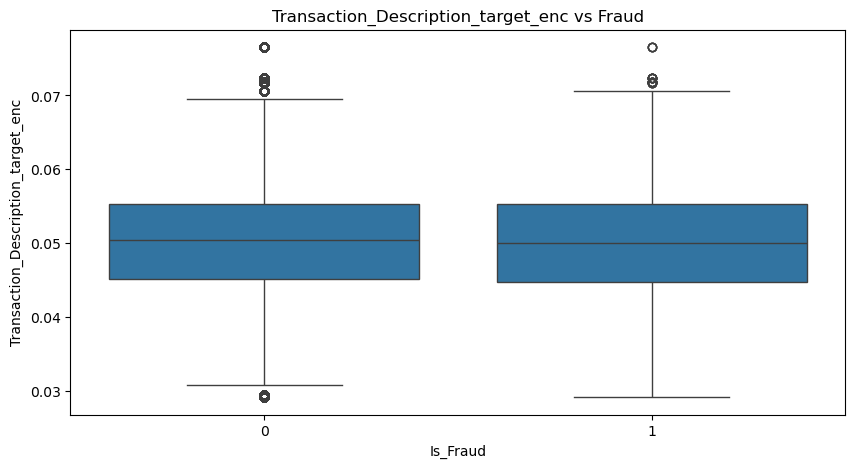

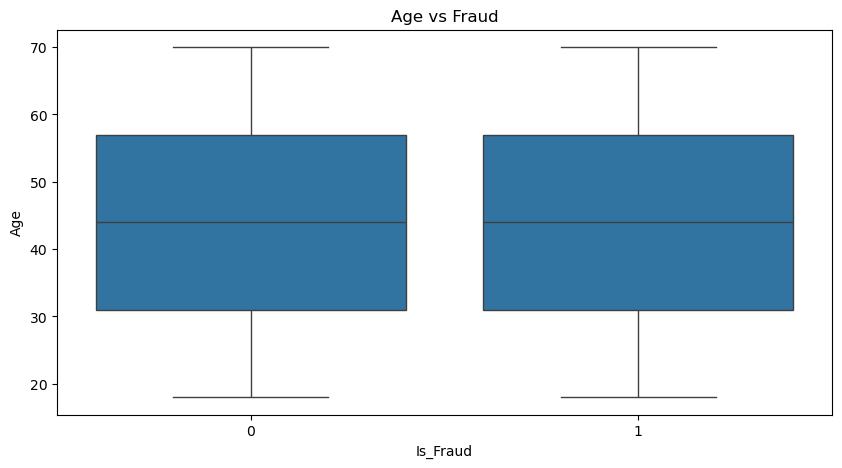

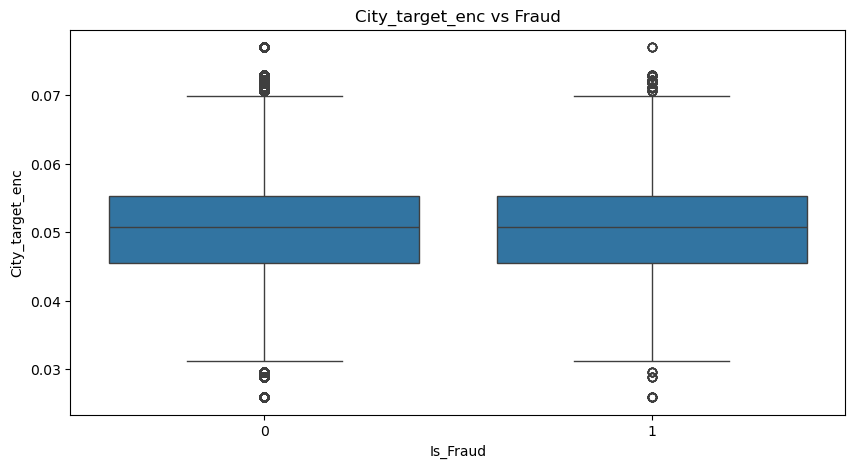

Is_Fraud                              1.000000
City_target_enc                       0.002324
Account_Balance                      -0.000453
Transaction_Amount                   -0.000710
Age                                  -0.000930
Transaction_Description_target_enc   -0.006727
Name: Is_Fraud, dtype: float64


In [34]:

top_features = feature_importances['Feature'][:5].tolist()  


for feature in top_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_set['Is_Fraud'], y=train_set[feature])
    plt.title(f"{feature} vs Fraud")
    plt.show()

correlation = train_set[top_features + ['Is_Fraud']].corr()
print(correlation['Is_Fraud'].sort_values(ascending=False))



In [42]:

X_train = train_set.drop(columns=['Is_Fraud', 'Transaction_Amount', 'Account_Balance'])
y_train = train_set['Is_Fraud']

X_test = test_set.drop(columns=['Is_Fraud', 'Transaction_Amount', 'Account_Balance'])
y_test = test_set['Is_Fraud']


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
print("Original columns in train_set:", train_set.columns)
print("Columns after dropping in X_train:", X_train.columns)


Original columns in train_set: Index(['Age', 'State', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Is_Fraud', 'Transaction_Day', 'Transaction_Weekday', 'Gender_Male',
       'Account_Type_Checking', 'Account_Type_Savings', 'Device_Type_Desktop',
       'Device_Type_Mobile', 'Device_Type_POS', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night', 'City_target_enc',
       'Bank_Branch_target_enc', 'Transaction_Location_target_enc',
       'Transaction_Description_target_enc'],
      dtype='object')
Columns after dropping in X_train: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
     

In [46]:
print("Remaining columns in X_train:", X_train.columns)
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_train: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
       'City_target_enc', 'Bank_Branch_target_enc',
       'Transaction_Location_target_enc',
       'Transaction_Description_target_enc'],
      dtype='object')
Remaining columns in X_test: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
       'City_target_enc', 'Bank_Branch_target_enc',
       'Trans